# Data Visulization in Python
written by: Ejaz ur Rehman\
Date: 2025-01-29\
Email: ijazfinance@gmail.com

In [1]:
# importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import dataset
ship = sns.load_dataset ('titanic')
ship

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# check the dataset information
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# to check the null values
ship.isnull ().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='survived'>

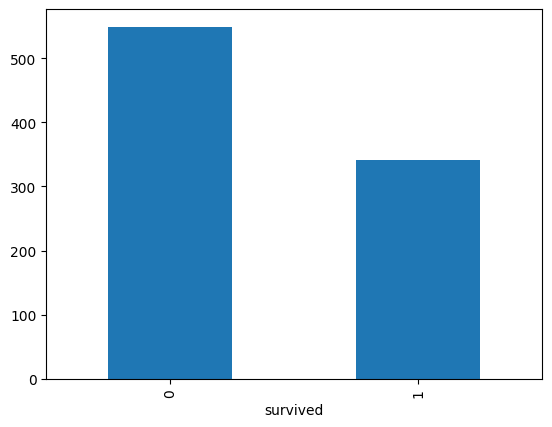

In [6]:
# bar plot
ship.survived.value_counts ().plot(kind='bar')

<Axes: xlabel='survived', ylabel='count'>

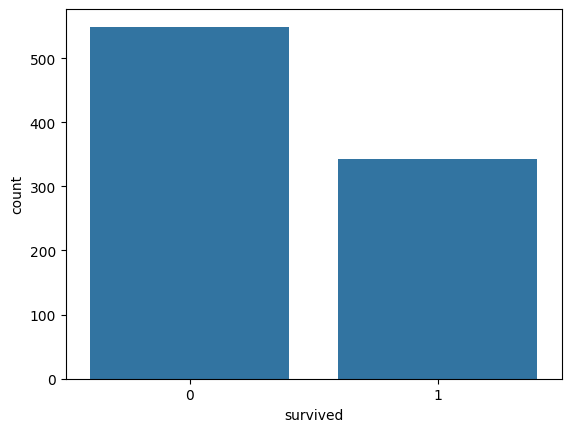

In [7]:
sns.countplot (x="survived", data=ship)

<Axes: xlabel='survived', ylabel='count'>

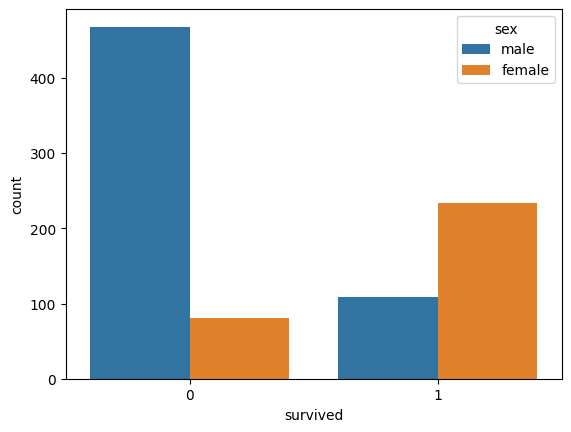

In [8]:
sns.countplot (x="survived", hue="sex", data=ship)

<Axes: xlabel='age', ylabel='fare'>

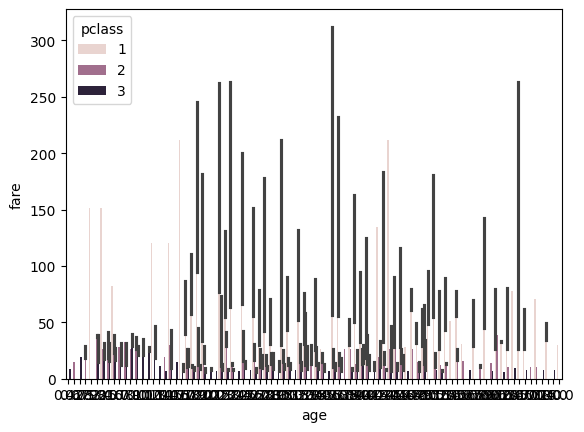

In [16]:
sns.barplot(data=ship, x="age", y="fare", hue="pclass")

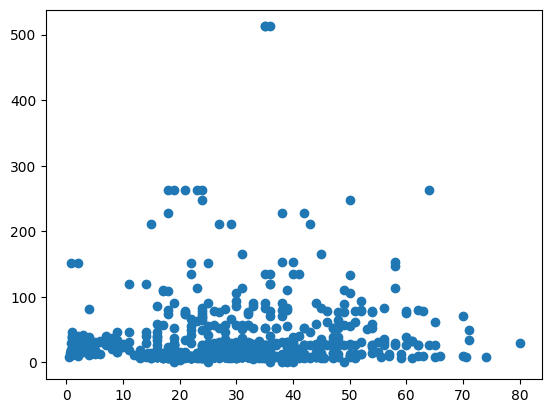

In [9]:
# scatter plot
plt.scatter(data=ship, x="age", y="fare")

<Axes: xlabel='age', ylabel='fare'>

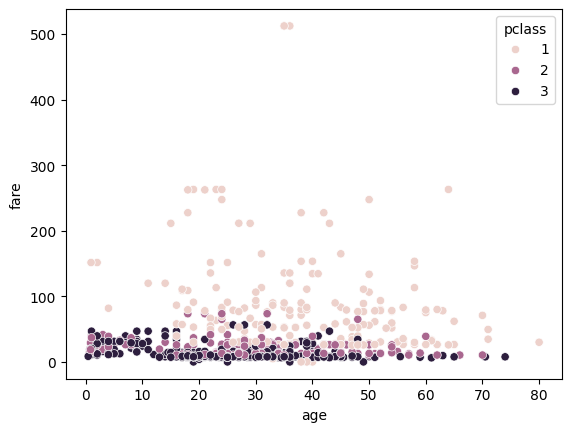

In [11]:
sns.scatterplot(data=ship, x="age", y="fare", hue="pclass")

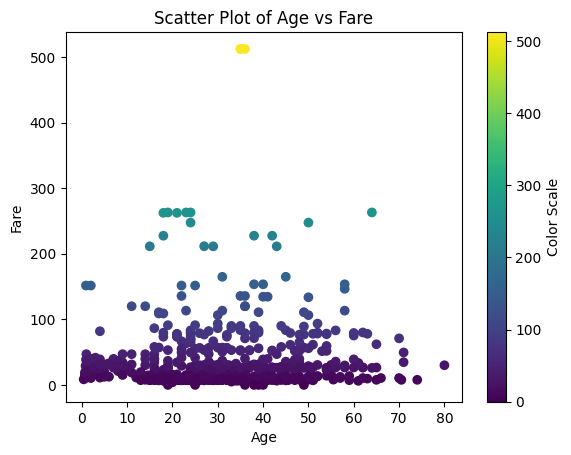

In [13]:
import matplotlib.pyplot as plt

#'ship' is our DataFrame and 'age' and 'fare' are columns
# plt.scatter(data=ship, x="age", y="fare", c="blue")  # Use a single color for all points
plt.scatter(data=ship, x="age", y="fare", c=ship["fare"], cmap="viridis")
# Alternatively, you can use a column for color mapping
# plt.scatter(data=ship, x="age", y="fare", c=ship["some_column"], cmap="viridis")  # Color based on a column

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Age vs Fare")
plt.colorbar(label="Color Scale")  # Add a color bar if using a colormap
plt.show()

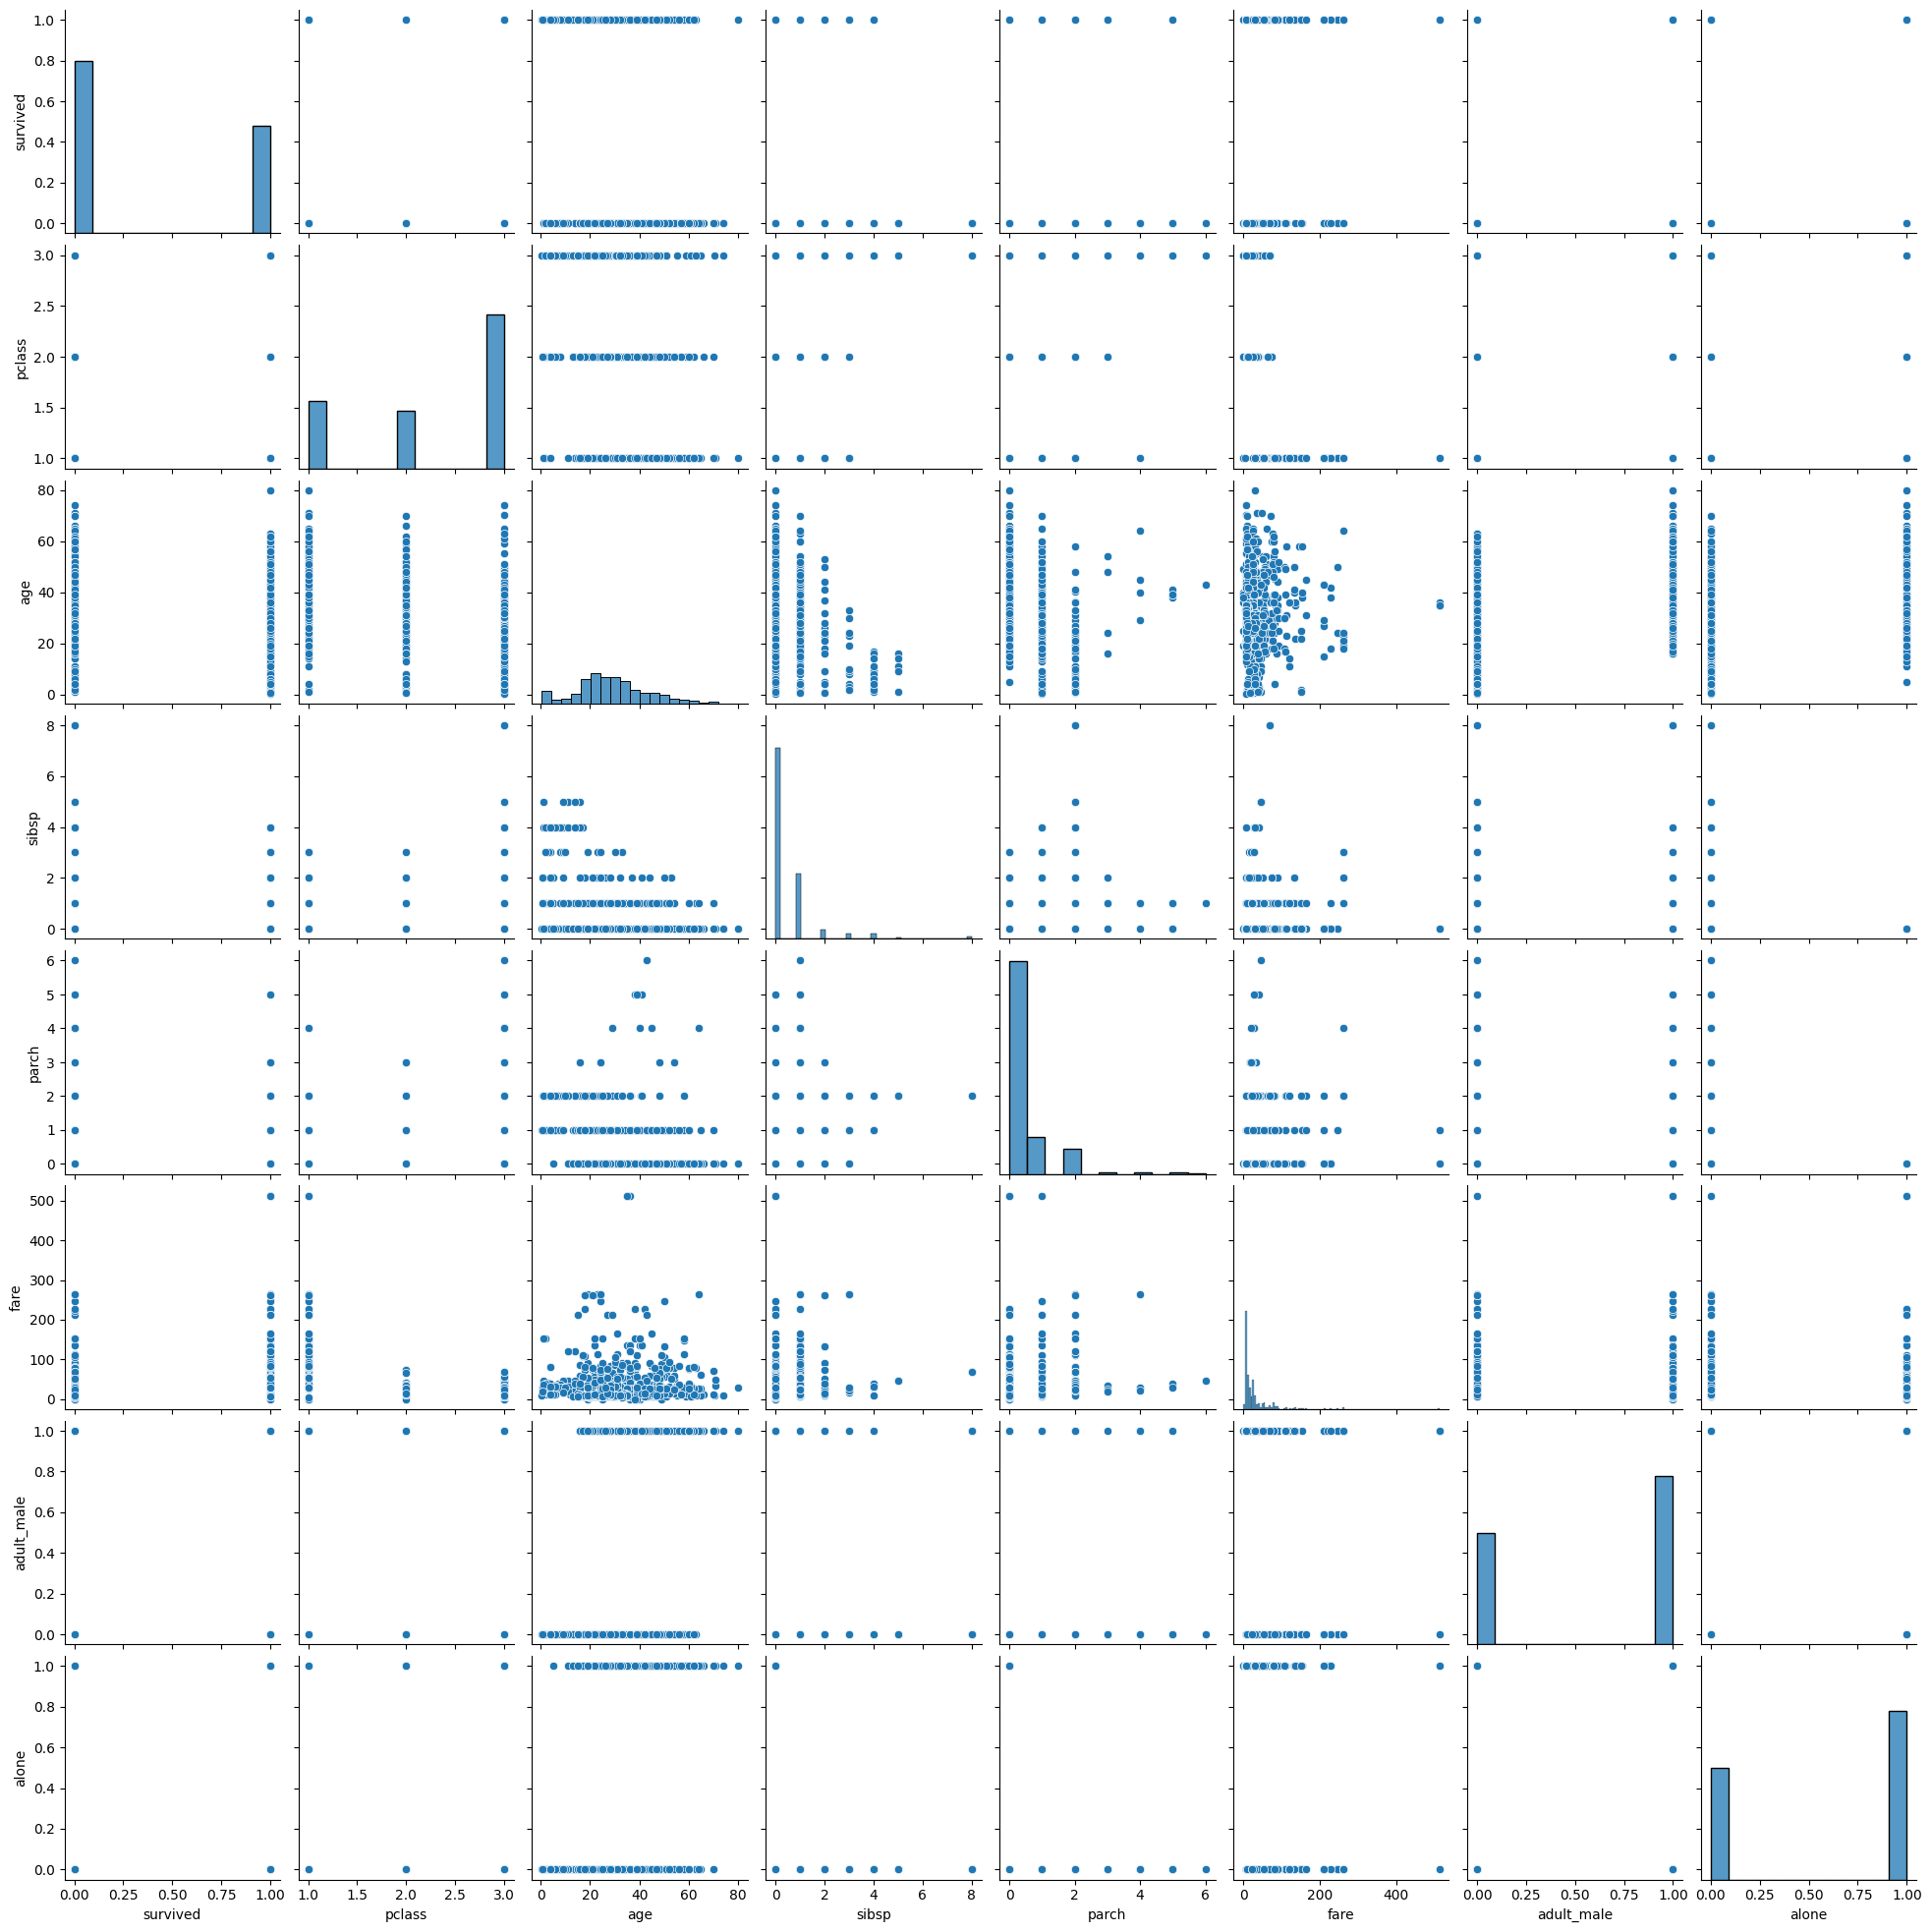

In [17]:
# pairplot
sns.pairplot (ship)

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

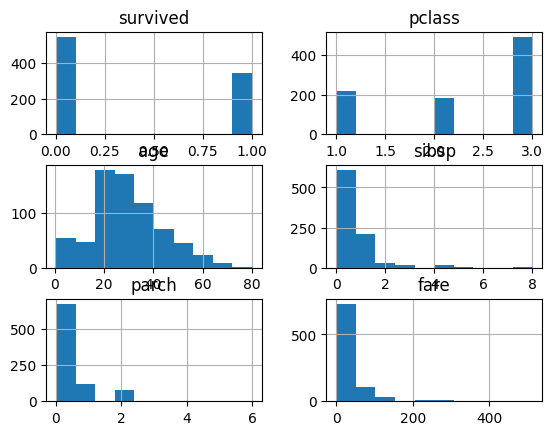

In [19]:
# hist plot
ship.hist ()

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

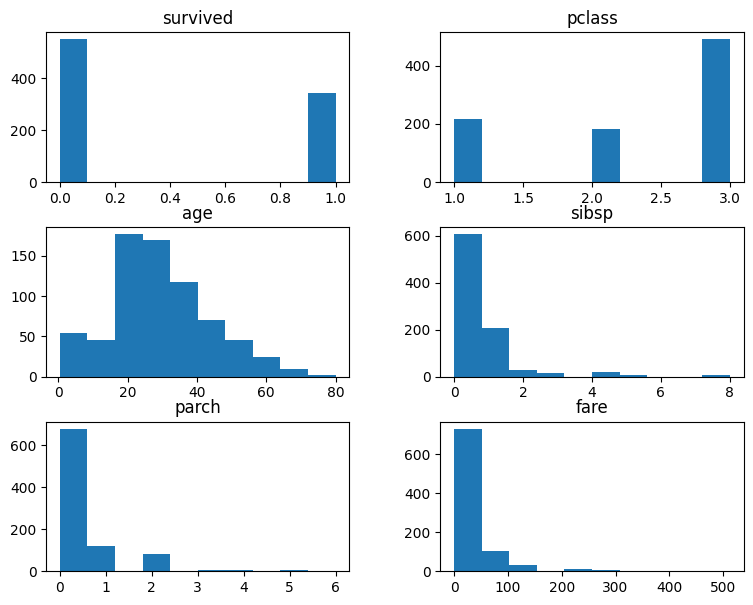

In [20]:
ship.hist (bins=10, figsize=(9,7), grid=False)

<Axes: xlabel='age', ylabel='fare'>

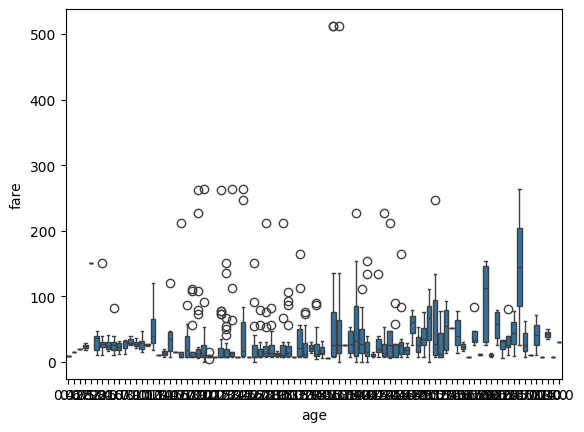

In [24]:
# box plot
sns.boxplot(data=ship, x="age", y="fare")

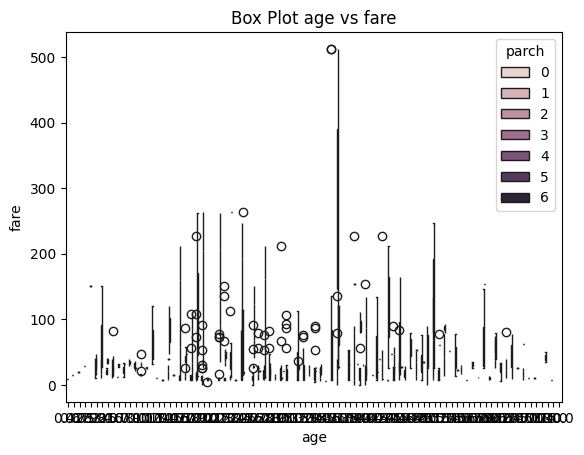

In [25]:
sns.boxplot(data=ship, x='age', y='fare', hue="parch")
plt.title('Box Plot age vs fare')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

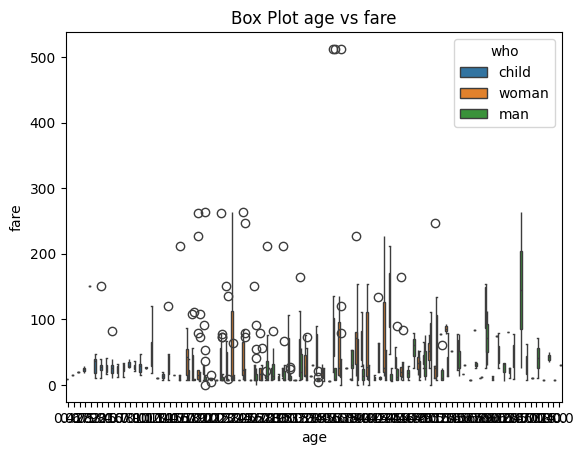

In [26]:
sns.boxplot(data=ship, x='age', y='fare', hue="who")
plt.title('Box Plot age vs fare')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

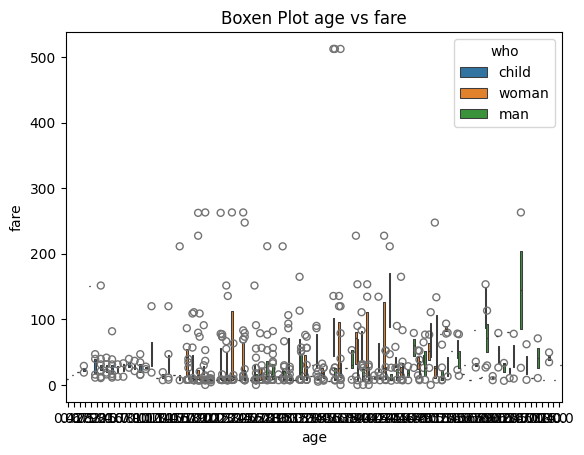

In [28]:
sns.boxenplot(data=ship, x='age', y='fare', hue="who")
plt.title('Boxen Plot age vs fare')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

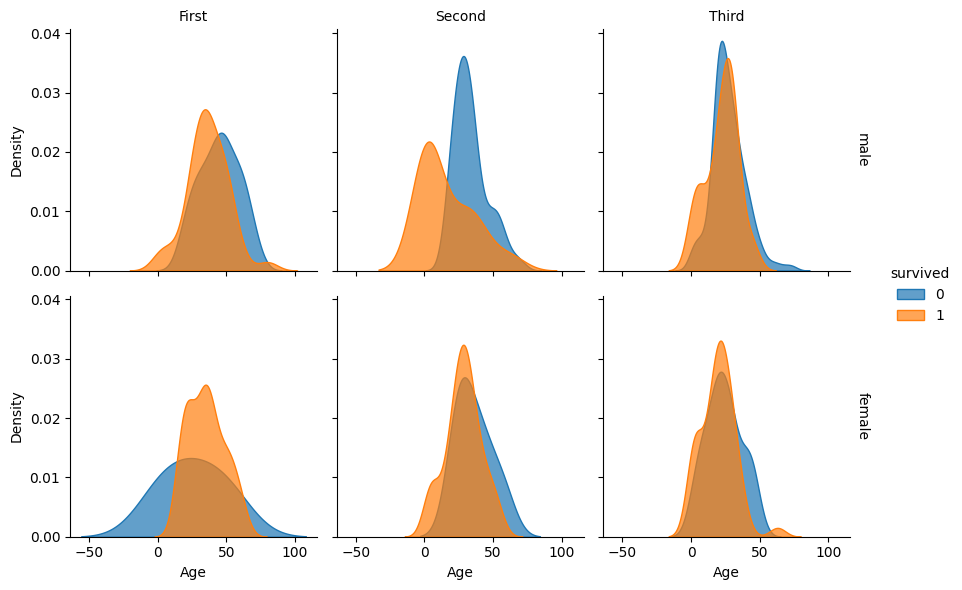

In [29]:
# facet grid
# Create a FacetGrid with KDE plots
g = sns.FacetGrid(ship, row='sex', col='class', hue='survived', margin_titles=True)
g.map(sns.kdeplot, 'age', fill=True, alpha=0.7)
g.add_legend()
g.set_axis_labels('Age', 'Density')
g.set_titles(row_template='{row_name}', col_template='{col_name}')

plt.show()

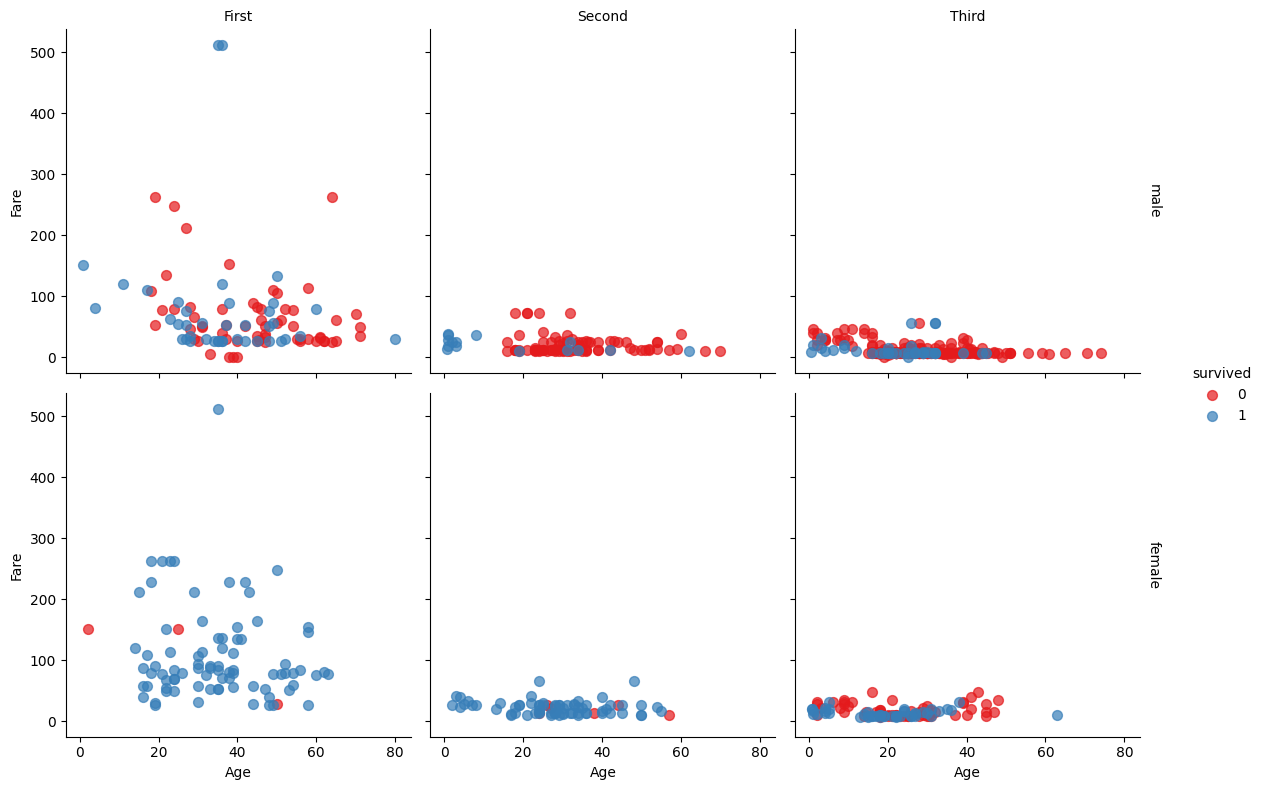

In [31]:
# Create a FacetGrid with custom point size and colormap
g = sns.FacetGrid(ship, row='sex', col='class', hue='survived', margin_titles=True, height=4, palette='Set1')
g.map(plt.scatter, 'age', 'fare', alpha=0.7, s=50)  # s=50 sets the point size
g.add_legend()
g.set_axis_labels('Age', 'Fare')
g.set_titles(row_template='{row_name}', col_template='{col_name}')

plt.show()

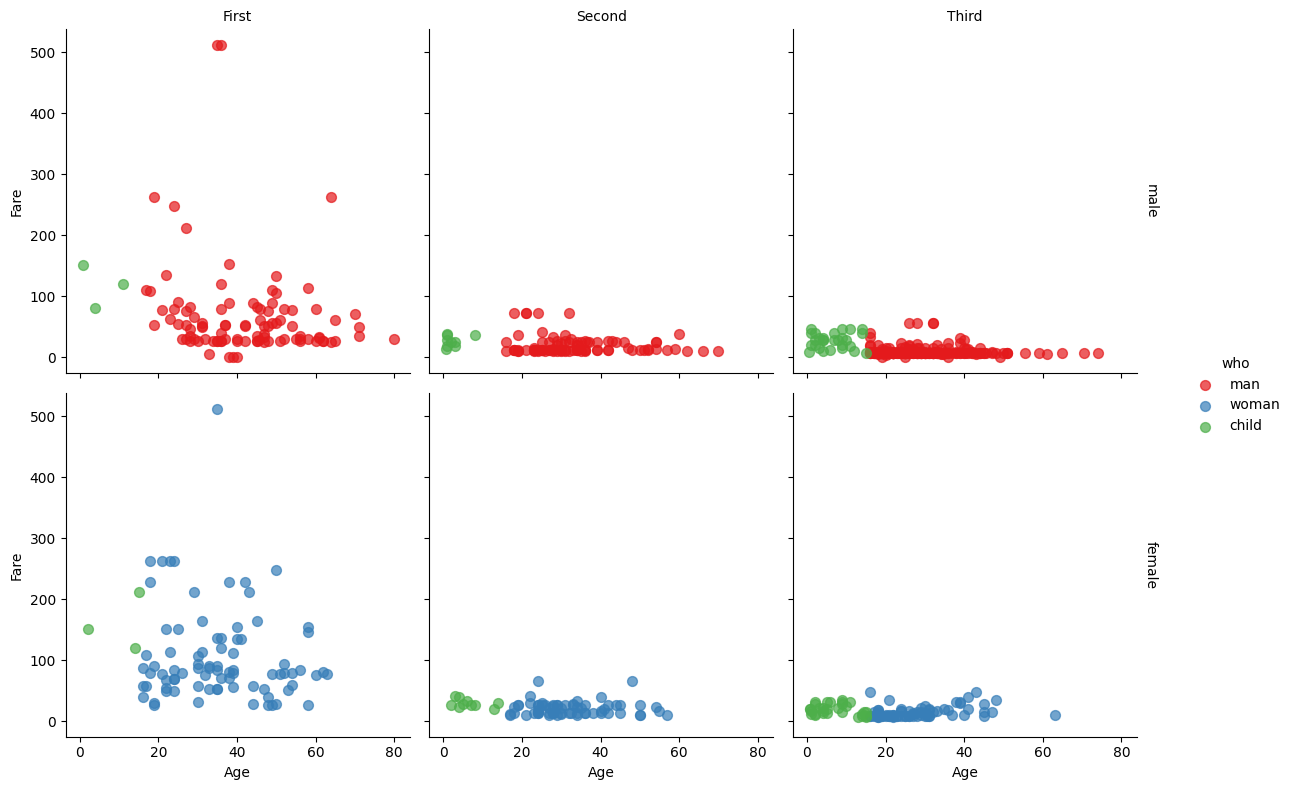

In [32]:
# Create a FacetGrid with custom point size and colormap
g = sns.FacetGrid(ship, row='sex', col='class', hue='who', margin_titles=True, height=4, palette='Set1')
g.map(plt.scatter, 'age', 'fare', alpha=0.7, s=50)  # s=50 sets the point size
g.add_legend()
g.set_axis_labels('Age', 'Fare')
g.set_titles(row_template='{row_name}', col_template='{col_name}')

plt.show()

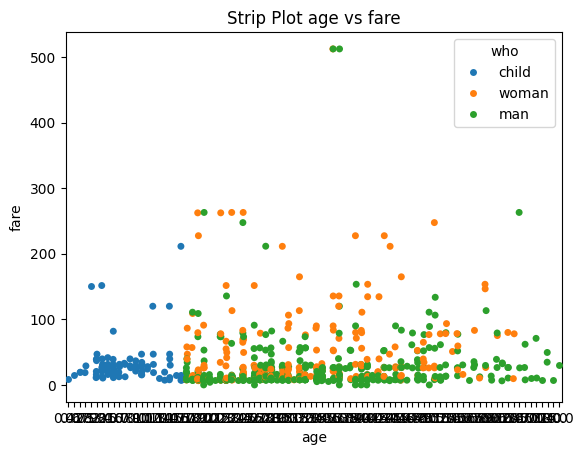

In [36]:
# strip plot
sns.stripplot(data=ship, x='age', y='fare', hue="who")
plt.title('Strip Plot age vs fare')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

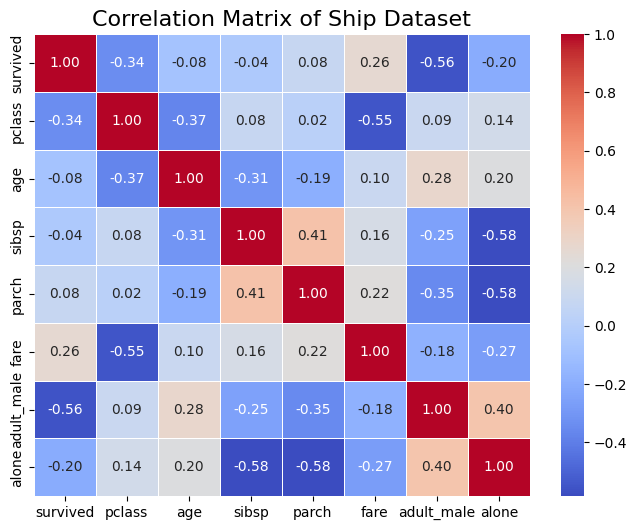

In [41]:
# heat map
# Calculate the correlation matrix
corr_matrix = ship.corr(numeric_only=True)
# Set the figure size
plt.figure(figsize=(8, 6))
# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
# Add a title
plt.title('Correlation Matrix of Ship Dataset', fontsize=16)
plt.show()

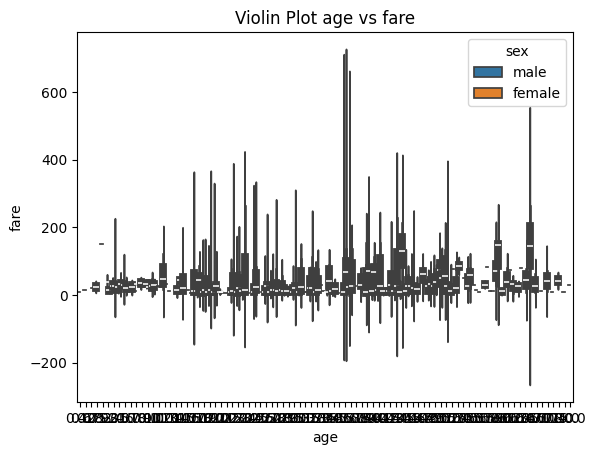

In [44]:
# violin plot
sns.violinplot(data=ship, x='age', y='fare', hue="sex")
plt.title('Violin Plot age vs fare')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()